## Activity: Titanic Survival Predictions Interpretation using Shap Values

1. Load the Titanic dataset into your Python environment. (use train then test)

2. Perform necessary data preprocessing steps, including handling missing values and encoding categorical variables.

3. Choose a machine learning model and train it on the preprocessed Titanic dataset.

4. Calculate Shap values for the trained model using the SHAP library. 

5. Select a specific instance (index) from the dataset for interpretation and explain how Shap values help in interpreting the prediction for that instance.

6. Visualize the Shap values for the selected instance and interpret the plot, highlighting feature contributions. 

7. Summarize the significance of Shap values in interpreting machine learning models' predictions, particularly in the context of the Titanic survival predictions.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import shap

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
df = pd.concat([train, test], ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
missing_columns = df.columns[df.isna().any()].tolist()
print('missing columns: ', missing_columns)

missing columns:  ['Survived', 'Age', 'Fare', 'Cabin', 'Embarked']


In [23]:
df['Survived'].fillna(2.0, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [24]:
encoder = LabelEncoder()

df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Cabin'] = encoder.fit_transform(df['Cabin'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [25]:
model = RandomForestClassifier(random_state=32)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

ExactExplainer explainer: 263it [00:31,  6.20it/s]                         


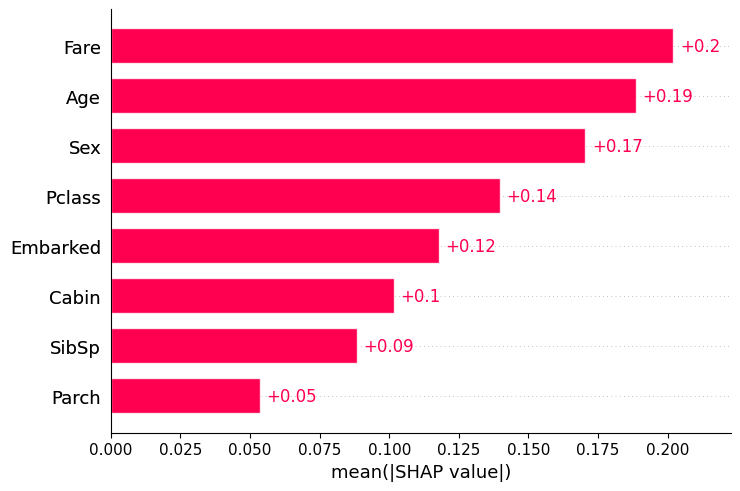

Survived      0.00
Pclass        3.00
Sex           1.00
Age          22.00
SibSp         1.00
Parch         0.00
Fare          7.25
Cabin       186.00
Embarked      2.00
Name: 0, dtype: float64

In [26]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

df.iloc[0]